# Checking New ICS Spectra

## Initialization

In [1]:
%load_ext autoreload
import sys
sys.path.append("..")

In [47]:
%autoreload

import matplotlib
matplotlib.rc_file('matplotlibrc')
import matplotlib.pyplot as plt

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [10,10]


from astropy.io import fits

import numpy as np
import pickle
import darkhistory.physics as phys
import darkhistory.spec.spectools as spectools
import darkhistory.spec.transferfunction as tf
from darkhistory.spec.spectrum import Spectrum
import darkhistory.history.tla as tla

from darkhistory.electrons.ics import bose_einstein_integrals
from darkhistory.electrons.ics.ics_spectrum import ics_spec
from darkhistory.electrons.ics.ics_spectrum import nonrel_spec_series
from darkhistory.electrons.ics.ics_spectrum import nonrel_spec_quad

from darkhistory.electrons.ics import nonrel_diff_terms

from darkhistory.electrons.ics.ics_engloss_spectrum import engloss_spec
from darkhistory.electrons.ics.ics_cooling import get_ics_cooling_tf

np.set_printoptions(threshold=np.nan)

In [49]:
beta_arr = np.array([0.05, 0.08])
photeng_arr = np.array([.015, .15])

nonrel_diff_terms.P_1_over_x(beta_arr, photeng_arr, 1.2)

(array([[-0.00012469, -0.00124525],
        [-0.00031795, -0.00317538]]), array([[1.41674338e-19, 1.40183882e-14],
        [2.37690096e-18, 2.35189527e-13]]))

In [4]:
nEe = 50
nEp = 60

Emax_rel = 1e10
Emin_rel = 1e-8

dlnEp = np.log(Emax_rel/Emin_rel)/nEp
lowengEp = Emin_rel*np.exp((np.arange(nEp)+0.5)*dlnEp)        

dlnEe = np.log(Emax_rel/Emin_rel)/nEe
lowengEe = Emin_rel*np.exp((np.arange(nEe)+0.5)*dlnEe)

In [12]:
test_quad_old = nonrel_spec_quad(lowengEe, lowengEp, phys.TCMB(1000), spec='old')
test_quad_new = nonrel_spec_quad(lowengEe, lowengEp, phys.TCMB(1000), spec='new')

/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the r

/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide


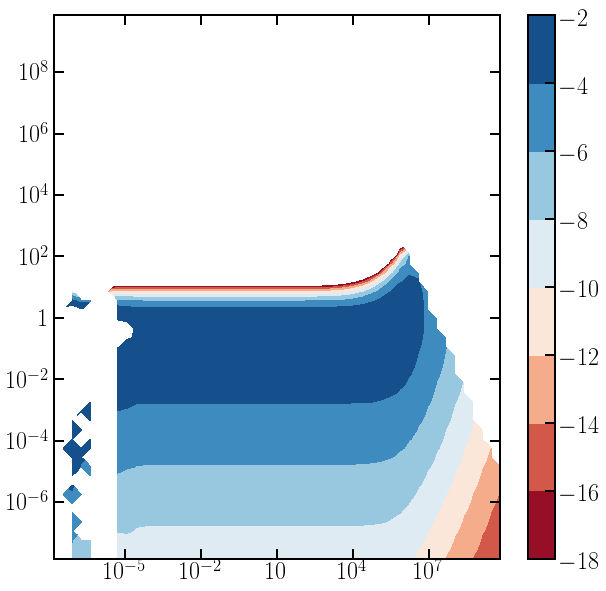

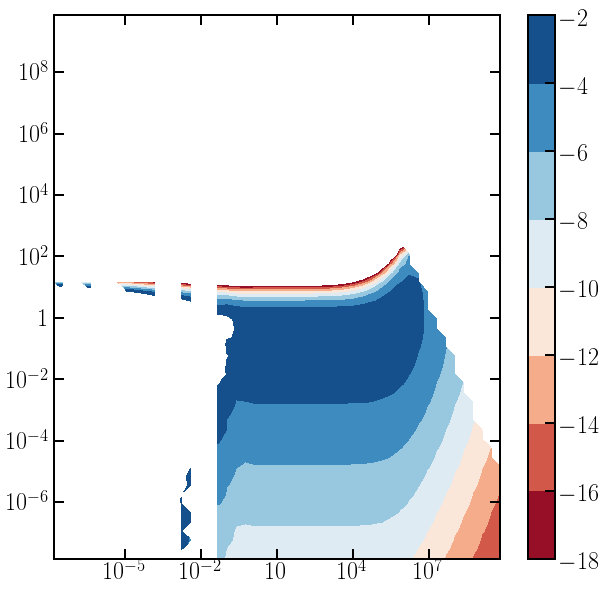

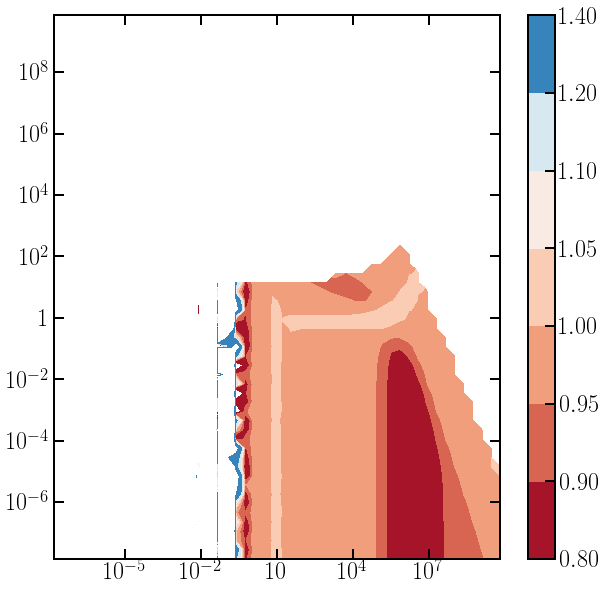

In [13]:
plt.figure()

plt.contourf(lowengEe, lowengEp, np.log10(np.transpose(test_quad_old)), levels=[-18, -16, -14, -12,-10, -8, -6, -4, -2], cmap = 'RdBu')
plt.colorbar()
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

plt.figure()

plt.contourf(lowengEe, lowengEp, np.log10(np.transpose(test_quad_new)), levels=[-18, -16, -14, -12,-10, -8, -6, -4, -2], cmap = 'RdBu')
plt.colorbar()
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

plt.figure()

plt.contourf(lowengEe, lowengEp, np.transpose(test_quad_new/test_quad_old), levels=[0.8, 0.9, 0.95, 1., 1.05, 1.10, 1.20, 1.40], cmap = 'RdBu')
plt.colorbar()
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

In [14]:
test_series_old = nonrel_spec_series(lowengEe, lowengEp, phys.TCMB(1000), spec='old')
test_series_new = nonrel_spec_series(lowengEe, lowengEp, phys.TCMB(1000), spec='new')

Computing spectra by analytic series...
Computing series 1/8...
Computing series 2/8...
Computing series 3/8...
Computing series 4/8...
Computing series 5/8...
Computing series 6/8...
Computing series 7/8...
Computing series 8/8...
***** Diagnostics *****
lowlim:  [[6.01424170e-08 1.19999898e-07 2.39431275e-07 4.77728199e-07
  9.53193073e-07 1.90187022e-06 3.79472997e-06 7.57148171e-06
  1.51070921e-05 3.01426116e-05 6.01424170e-05 1.19999898e-04
  2.39431275e-04 4.77728199e-04 9.53193073e-04 1.90187022e-03
  3.79472997e-03 7.57148171e-03 1.51070921e-02 3.01426116e-02
  6.01424170e-02 1.19999898e-01 2.39431275e-01 4.77728199e-01
  9.53193073e-01 1.90187022e+00 3.79472997e+00 7.57148171e+00
  1.51070921e+01 3.01426116e+01 6.01424170e+01 1.19999898e+02
  2.39431275e+02 4.77728199e+02 9.53193073e+02 1.90187022e+03
  3.79472997e+03 7.57148171e+03 1.51070921e+04 3.01426116e+04
  6.01424170e+04 1.19999898e+05 2.39431275e+05 4.77728199e+05
  9.53193073e+05 1.90187022e+06 3.79472997e+06 7.5714

term_low_3:  [[-1.61493030e-015 -3.22220948e-015 -6.42915275e-015 -1.28278447e-014
  -2.55949090e-014 -5.10685331e-014 -1.01895023e-013 -2.03306916e-013
  -4.05649099e-013 -8.09370276e-013 -1.61488179e-012 -3.22201634e-012
  -6.42838388e-012 -1.28247839e-011 -2.55827247e-011 -5.10200342e-011
  -1.01702006e-010 -2.02538986e-010 -4.02595765e-010 -7.97245302e-010
  -1.56685418e-009 -3.03274293e-009 -5.69016769e-009 -1.00067806e-008
  -1.53056565e-008 -1.70443653e-008 -8.89574691e-009 -7.93057981e-010
  -1.68424999e-012 -1.97952823e-018 -7.37579064e-031 -2.96502575e-056
  -1.59818874e-107 -2.05382485e-210 -0.00000000e+000 -0.00000000e+000
  -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
  -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
  -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
  -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
  -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
  -0.00

term_high_3:  [[1.61493030e-015 3.22220948e-015 6.42915276e-015 1.28278447e-014
  2.55949090e-014 5.10685331e-014 1.01895023e-013 2.03306916e-013
  4.05649099e-013 8.09370277e-013 1.61488179e-012 3.22201634e-012
  6.42838389e-012 1.28247839e-011 2.55827247e-011 5.10200342e-011
  1.01702006e-010 2.02538986e-010 4.02595764e-010 7.97245297e-010
  1.56685416e-009 3.03274283e-009 5.69016734e-009 1.00067794e-008
  1.53056524e-008 1.70443550e-008 8.89573443e-009 7.93055443e-010
  1.68423843e-012 1.97950015e-018 7.37557830e-031 2.96485400e-056
  1.59800326e-107 2.05334829e-210 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+

term_low_4 + term_high_4:  [[-3.14448034e-021 -6.27406450e-021 -1.25184097e-020 -2.49775310e-020
  -4.98368010e-020 -9.94377724e-020 -1.98405495e-019 -3.95874952e-019
  -7.89889045e-019 -1.57609016e-018 -3.14491323e-018 -6.27565788e-018
  -1.25242319e-017 -2.49986486e-017 -4.99126621e-017 -9.97072320e-017
  -1.99347620e-016 -3.99103793e-016 -7.98574210e-016 -1.61057969e-015
  -3.24834621e-015 -6.57659930e-015 -1.30715307e-014 -2.49371569e-014
  -4.21124137e-014 -4.97081732e-014 -2.01945937e-014  1.37799336e-015
   2.60143654e-017  1.06067215e-022  1.11018920e-034  1.14108904e-059
   1.49169240e-110  4.49502589e-213  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.0000000

lowlim:  [[6.01424170e-08 1.19999898e-07 2.39431275e-07 4.77728199e-07
  9.53193073e-07 1.90187022e-06 3.79472997e-06 7.57148171e-06
  1.51070921e-05 3.01426116e-05 6.01424170e-05 1.19999898e-04
  2.39431275e-04 4.77728199e-04 9.53193073e-04 1.90187022e-03
  3.79472997e-03 7.57148171e-03 1.51070921e-02 3.01426116e-02
  6.01424170e-02 1.19999898e-01 2.39431275e-01 4.77728199e-01
  9.53193073e-01 1.90187022e+00 3.79472997e+00 7.57148171e+00
  1.51070921e+01 3.01426116e+01 6.01424170e+01 1.19999898e+02
  2.39431275e+02 4.77728199e+02 9.53193073e+02 1.90187022e+03
  3.79472997e+03 7.57148171e+03 1.51070921e+04 3.01426116e+04
  6.01424170e+04 1.19999898e+05 2.39431275e+05 4.77728199e+05
  9.53193073e+05 1.90187022e+06 3.79472997e+06 7.57148171e+06
  1.51070921e+07 3.01426116e+07 6.01424170e+07 1.19999898e+08
  2.39431275e+08 4.77728199e+08 9.53193073e+08 1.90187022e+09
  3.79472997e+09 7.57148171e+09 1.51070921e+10 3.01426116e+10]
 [6.01424020e-08 1.19999868e-07 2.39431215e-07 4.77728080e-0

term_low_5:  [[2.92762776e-014 5.84138516e-014 1.16550950e-013 2.32549690e-013
  4.63997523e-013 9.25796333e-013 1.84720479e-012 3.68565114e-012
  7.35381311e-012 1.46726759e-011 2.92753981e-011 5.84103503e-011
  1.16537011e-010 2.32494202e-010 4.63776639e-010 9.24917119e-010
  1.84370568e-009 3.67172972e-009 7.29846072e-009 1.44528682e-008
  2.84047293e-008 5.49791056e-008 1.03154253e-007 1.81408007e-007
  2.77468722e-007 3.08988920e-007 1.61266623e-007 1.43769583e-008
  3.05329401e-011 3.58858943e-017 1.33712083e-029 5.37514943e-055
  2.89727780e-106 3.72327811e-209 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+0

term_high_6:  [[-2.92058304e-012 -5.58522378e-012 -1.06609222e-011 -2.03074953e-011
  -3.85956603e-011 -7.31713226e-011 -1.38339816e-010 -2.60747943e-010
  -4.89779556e-010 -9.16418148e-010 -1.70713071e-009 -3.16398081e-009
  -5.82958883e-009 -1.06665645e-008 -1.93553399e-008 -3.47671983e-008
  -6.16625007e-008 -1.07582474e-007 -1.83596864e-007 -3.03667818e-007
  -4.79081184e-007 -6.99421687e-007 -8.84747270e-007 -8.04050768e-007
  -7.98062632e-008  1.19177992e-006  1.29040367e-006  1.74626950e-007
   4.97408777e-010  7.33341471e-016  3.28659043e-028  1.54392066e-053
   9.52213880e-105  1.37782492e-207  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.0

term_low_5 + term_high_5:  [[-2.85022515e-020 -5.68885501e-020 -1.13492536e-019 -2.26356848e-019
  -4.51878037e-019 -9.01397902e-019 -1.79884389e-018 -3.58878674e-018
  -7.16116603e-018 -1.42887511e-017 -2.85015324e-017 -5.68770552e-017
  -1.13436933e-016 -2.26321252e-016 -4.51373957e-016 -9.00070233e-016
  -1.79362385e-015 -3.56823799e-015 -7.08135086e-015 -1.39661178e-014
  -2.72414997e-014 -5.18876685e-014 -9.41832095e-014 -1.53877604e-013
  -1.95795605e-013 -1.15126173e-013  6.92553841e-014  3.20068235e-014
   1.79924491e-016  4.74136404e-022  3.71926803e-034  3.06124934e-059
   3.33429883e-110  8.60310617e-213  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.0000000

/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide


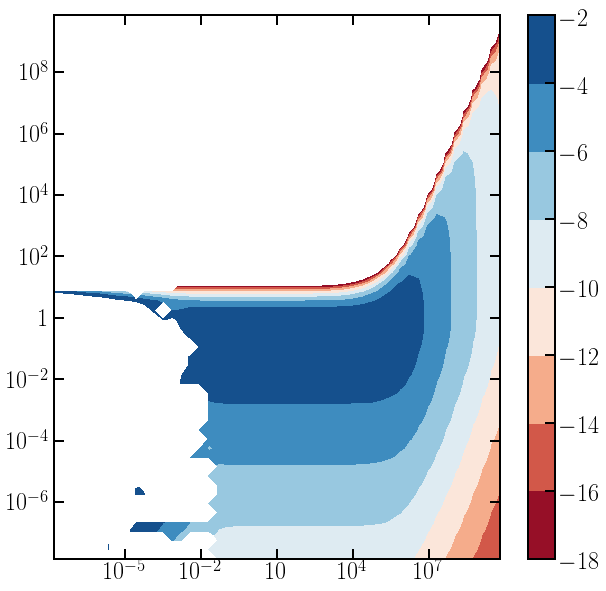

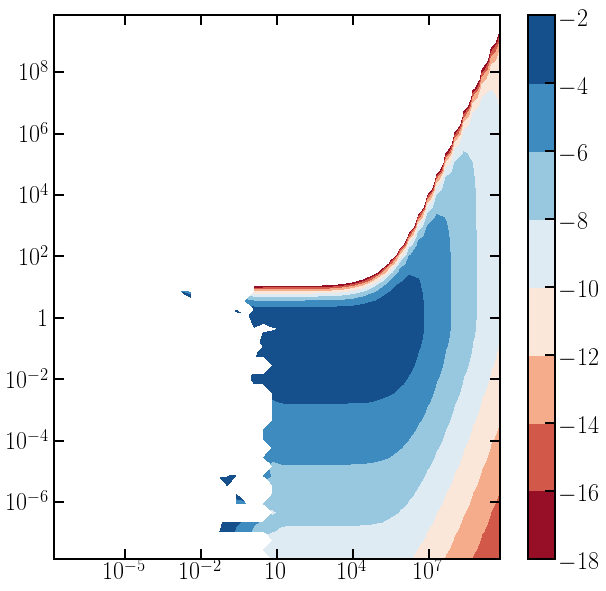

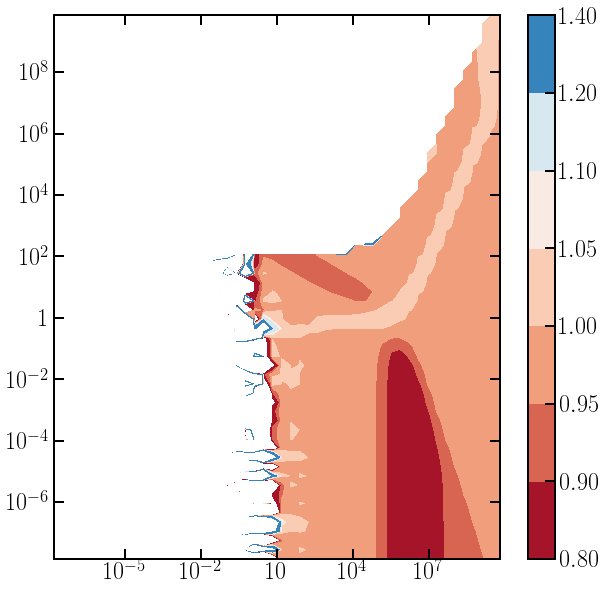

In [15]:
plt.figure()

plt.contourf(lowengEe, lowengEp, np.log10(np.transpose(test_series_old)), levels=[-18, -16, -14, -12,-10, -8, -6, -4, -2], cmap = 'RdBu')
plt.colorbar()
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

plt.figure()

plt.contourf(lowengEe, lowengEp, np.log10(np.transpose(test_series_new)), levels=[-18, -16, -14, -12,-10, -8, -6, -4, -2], cmap = 'RdBu')
plt.colorbar()
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

plt.figure()

plt.contourf(lowengEe, lowengEp, np.transpose(test_series_new/test_series_old), levels=[0.8, 0.9, 0.95, 1., 1.05, 1.10, 1.20, 1.40], cmap = 'RdBu')
plt.colorbar()
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

1659586.9074375595


[1e-08, 10000000000.0, 0.0006, 0.00075]

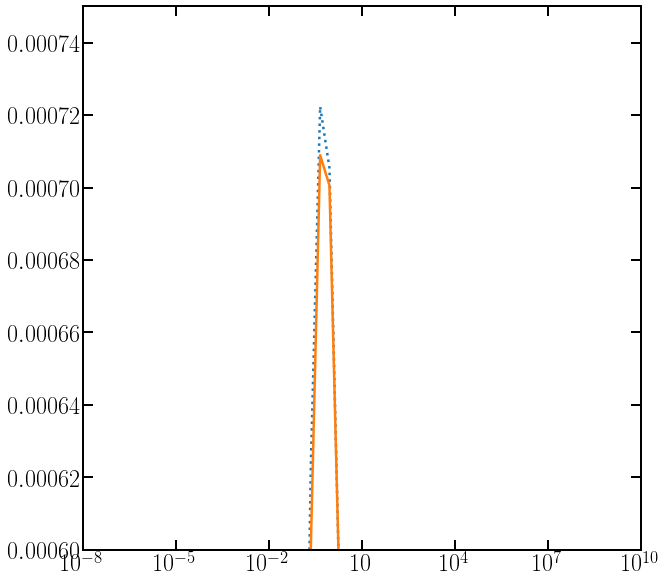

In [31]:
i = 39
print(lowengEe[i])
plt.figure()
# plt.plot(lowengEp, test_quad_old[i,:], ':')
plt.plot(lowengEp, test_series_old[i,:], ':')
# plt.plot(lowengEp, test_quad_new[i,:])
plt.plot(lowengEp, test_series_new[i,:])
ax = plt.gca()

ax.set_xscale('log')
# ax.set_yscale('log')

plt.axis([1e-8, 1e10, 6e-4, 7.5e-4])

In [10]:
j = 37
nonrel_spec_series(lowengEe[i], lowengEp[j:j+3], phys.TCMB(1000), spec='old')
nonrel_spec_series(lowengEe[i], lowengEp[j:j+3], phys.TCMB(1000), spec='new')

1778.2794100389212
Computing spectra by analytic series...
Computing series 1/8...
Computing series 2/8...
Computing series 3/8...
Computing series 4/8...
Computing series 5/8...
Computing series 6/8...
Computing series 7/8...
Computing series 8/8...
***** Diagnostics *****
lowlim:  [[0.00855291 0.01706529 0.03404974]]
upplim:  [[6.70267851e+09 1.33736018e+10 2.66838438e+10]]
photeng/T:  [ 7571.4853975  15107.09948197 30142.62628487]
beta:  0.9999977407608508
***** epsilon < epsilon_1 *****
term_low_1:  [[0.09026661 0.08980005 0.08887508]]
term_low_2:  [[0.00224845 0.00383999 0.00638022]]
term_low_3:  [[-0.00091928 -0.00179701 -0.00345934]]
term_low_4:  [[-0.02792682 -0.04238929 -0.06161609]]
term_low_5:  [[0.01654689 0.02543459 0.03748566]]
***** epsilon > epsilon_1 *****
term_high_1:  [[-0. -0. -0.]]
term_high_2:  [[-0. -0. -0.]]
term_high_3:  [[0. 0. 0.]]
term_high_4:  [[0. 0. 0.]]
term_high_5:  [[0. 0. 0.]]
***** Term Sums *****
term_low_1 + term_high_1:  [[0.09026661 0.08980005 0.